In [115]:
import pandas as pd
import numpy as np

In [116]:
pd.set_option('display.max_columns', 500)
df = pd.read_excel("all_games.xlsx")
df['Shot Position'] = df['Shot Position'].str.strip()
df['Shot Location'] = df['Shot Location'].str.strip()
df.reset_index(inplace=True)


In [117]:
# Add a column to the dataframe to include the total-time of the 6 on 5
def time_of_possession(df):
    df["total_time"] = (pd.to_datetime(df['Start Time'].astype(str)) - 
                    pd.to_datetime(df['End Time'].astype(str))).dt.seconds / 60
    return df

In [118]:
df = time_of_possession(df)

In [119]:
df

,index,Unnamed: 0,Number of Passes,Passing Sequence,Shooter Position,Shooter Hand,Rebound,Goal,Block,Skip,Lob,Shot Position,Shot Location,Assisting Player Position,Assisting Player Hand,Rotation Type,Timeout,Team,Turnover,Quarter,Start Time,End Time,Dropped Ball,Kickout Position,End 3-3,5m,Link to Play,Shooter Number,Assisting Player Number,total_time
0,0,0,10.0,"[1, 4, 5, 6, 5, 6, 5, 1, 4, 6, 2]",2,1,0.0,1,none,1,0,low,left,6,0,6_in,0,AN Brescia,0,1,07:17:00,06:58:00,4,0,0,0,https://youtu.be/NxeNwYt8FS8?t=281,NaN,NaN,19.0
1,1,1,1.0,"[3, 4]",4,1,0.0,1,none,1,0,low,left,3,1,none,0,Szolonki VSC,0,1,04:40:00,04:37:00,0,0,0,0,https://youtu.be/NxeNwYt8FS8?t=475,NaN,NaN,3.0
2,2,2,13.0,"[4, 6, 4, 5, 1, 5, 6, 5, 4, 1, 5, 1, 5, 6]",none,none,0.0,0,none,0,0,none,none,none,none,"6_in, 1_pocket, 5_center",1,AN Brescia,1,1,02:24:00,02:04:00,3,0,0,0,https://youtu.be/NxeNwYt8FS8?t=744,NaN,NaN,20.0
3,3,3,9.0,"[4, 1, 4, 6, 5, 6, 4,1, 4, 6]",6,0,0.0,1,none,1,0,low,left,4,1,"1_in, 6_pocket, 5_center",0,Szolonki VSC,0,2,05:03:00,04:44:00,0,1,0,0,https://youtu.be/NxeNwYt8FS8?t=1334,NaN,NaN,19.0
4,4,4,10.0,"[5, 4, 6, 5, 4, 5, 6, 5, 4, 1, 5]",5,0,1.0,0,field_player,0,0,high,right,1,1,"1_in, 5_center",0,AN Brescia,0,2,04:16:00,04:00:00,1,0,0,0,https://youtu.be/NxeNwYt8FS8?t=1436,NaN,NaN,16.0
5,5,5,4.0,"[4, 2, 4, 6, 1]",1,1,0.0,0,goalie,1,0,low,left,6,0,"2_pop, 5_in, 1_pocket",1,Szolonki VSC,0,2,01:41:00,01:18:00,2,0,1,0,https://youtu.be/NxeNwYt8FS8?t=1655,NaN,NaN,23.0
6,6,6,1.0,"[5, 4]",4,1,0.0,0,none,0,0,high,right,5,1,4_center,0,Szolonki VSC,0,2,00:59:00,00:53:00,0,0,0,0,https://youtu.be/NxeNwYt8FS8?t=1783,NaN,NaN,6.0
7,7,7,7.0,"[2, 4, 5, 6, 5, 4, 1, 3]",3,1,0.0,0,none,1,0,low,right,1,1,"6_pocket, 3_in",0,AN Brescia,0,3,07:23:00,07:05:00,1,0,0,0,https://youtu.be/NxeNwYt8FS8?t=2030,NaN,NaN,18.0
8,8,8,8.0,"[1, 4, 6, 5, 1, 4, 6, 4, 6]",6,0,1.0,0,goalie,0,0,middle,left,4,1,"1_in, 6_pocket",0,Szolonki VSC,0,3,06:39:00,06:19:00,2,0,1,0,https://youtu.be/NxeNwYt8FS8?t=2087,NaN,NaN,20.0
9,9,9,3.0,"[6, 5, 4, 1]",1,1,0.0,1,none,1,0,low,left,4,1,"6_in, 1_pocket",0,Szolonki VSC,0,3,05:54:00,05:44:00,1,0,0,0,https://youtu.be/NxeNwYt8FS8?t=2142,NaN,NaN,10.0


In [6]:
df.dtypes

index                          int64
Number of Passes             float64
Passing Sequence              object
Shooter Position              object
Shooter Hand                  object
Rebound                      float64
Goal                           int64
Block                         object
Skip                           int64
Lob                            int64
Shot Position                 object
Shot Location                 object
Assisting Player Position     object
Assisting Player Hand         object
Rotation Type                 object
Timeout                        int64
Team                          object
Turnover                       int64
Quarter                        int64
Start Time                    object
End Time                      object
Dropped Ball                   int64
Kickout Position               int64
End 3-3                        int64
5m                             int64
Link to Play                  object
Shooter Number                object
A

#### Total Percentage of Converted 6-on-5

In [7]:
sum(df['Goal']==1)/df.shape[0]

0.36936936936936937

# Position Analysis

Gets location break down of shots from passed in data frame

In [8]:
# input: pandas dataFrame
# output: {(shot position, shot location):(goals, attempts, percentage)}
def shot_breakdown(df):
    shot_df = df.groupby(["Shot Position", "Shot Location"]).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    shot_df["Goal_Percentage"] = shot_df["Goal"]/shot_df["Attempts"] * 100
    shot_dict = dict()
    for _, row in shot_df.iterrows():
        shot_key = (row["Shot Position"], row["Shot Location"])
        shot_value = (row["Goal"], row["Attempts"], row["Goal_Percentage"])
        shot_dict[shot_key] = shot_value
    return shot_dict

## Shooters

In [9]:
def shot_dict(df):
    freq_dict = {}
    for i in range(1, 7):
        filter_df = df[df['Shooter Position'] == i]
        goals = filter_df['Goal'].sum()
        shots = filter_df.shape[0]
        percentage = 0 if goals == 0 else goals/shots
        freq_dict[i] = (goals, shots, percentage)
    return freq_dict

In [10]:
shot_dict(df)

{1: (23, 53, 0.4339622641509434),
 2: (14, 35, 0.4),
 3: (9, 22, 0.4090909090909091),
 4: (11, 31, 0.3548387096774194),
 5: (7, 26, 0.2692307692307692),
 6: (18, 36, 0.5)}

In [11]:
def get_miss_breakdown(df):
    goalie_block = sum(df['Block'] == 'goalie')
    field_block = sum(df['Block'] == 'field')
    turn_overs = sum(df['Turnover'] == 1)
    non_goal = sum(df['Goal'] == 0)
    return {'goalie': goalie_block, 'field': field_block,
            'missed': non_goal - goalie_block - field_block - turn_overs, "turnovers": turn_overs,
            'percent_goalie': goalie_block/df.shape[0], 'percent_field': field_block/df.shape[0],
            'percent_missed': (non_goal - goalie_block - field_block - turn_overs)/df.shape[0]}

In [12]:
def get_all_position_misses(df):
    freq_dict = {}
    for i in range(1,7):
        filter_df = df[df['Shooter Position'] == i]
        freq_dict[i] = get_miss_breakdown(filter_df)
    return freq_dict

In [13]:
get_all_position_misses(df)

{1: {'goalie': 18,
  'field': 4,
  'missed': 8,
  'turnovers': 0,
  'percent_goalie': 0.33962264150943394,
  'percent_field': 0.07547169811320754,
  'percent_missed': 0.1509433962264151},
 2: {'goalie': 15,
  'field': 1,
  'missed': 4,
  'turnovers': 1,
  'percent_goalie': 0.42857142857142855,
  'percent_field': 0.02857142857142857,
  'percent_missed': 0.11428571428571428},
 3: {'goalie': 6,
  'field': 2,
  'missed': 4,
  'turnovers': 1,
  'percent_goalie': 0.2727272727272727,
  'percent_field': 0.09090909090909091,
  'percent_missed': 0.18181818181818182},
 4: {'goalie': 8,
  'field': 4,
  'missed': 8,
  'turnovers': 0,
  'percent_goalie': 0.25806451612903225,
  'percent_field': 0.12903225806451613,
  'percent_missed': 0.25806451612903225},
 5: {'goalie': 4,
  'field': 2,
  'missed': 13,
  'turnovers': 0,
  'percent_goalie': 0.15384615384615385,
  'percent_field': 0.07692307692307693,
  'percent_missed': 0.5},
 6: {'goalie': 9,
  'field': 3,
  'missed': 6,
  'turnovers': 0,
  'percent

Gets the shot location breakdown for a given position

In [14]:
# pass in assist_pos if we want to see data with assist pair
# pass in nothing for assist_pos to only get data on the shooting_pos (independent of assisting player position)
def positions_shots(df, shooter_pos, assist_pos=None):
    if assist_pos is None:
        filter_df = df[df['Shooter Position'] == shooter_pos]
        return shot_breakdown(filter_df)
    filter_df = df[(df['Shooter Position'] == shooter_pos) & (df["Assisting Player Position"] == assist_pos)]
    return shot_breakdown(filter_df)

### Shooter from 1

In [15]:
positions_shots(df, 1)

{('bottom', 'left'): (1, 2, 50.0),
 ('high', 'center'): (2, 2, 100.0),
 ('high', 'left'): (4, 12, 33.33333333333333),
 ('high', 'right'): (3, 5, 60.0),
 ('low', 'left'): (7, 10, 70.0),
 ('low', 'not_on_cage'): (0, 1, 0.0),
 ('low', 'right'): (3, 5, 60.0),
 ('mid', 'right'): (0, 1, 0.0),
 ('middle', 'center'): (0, 3, 0.0),
 ('middle', 'left'): (3, 5, 60.0),
 ('middle', 'not_on_cage'): (0, 1, 0.0),
 ('middle', 'right'): (0, 1, 0.0),
 ('none', 'none'): (0, 2, 0.0),
 ('not_on_cage', 'left'): (0, 1, 0.0),
 ('not_on_cage', 'not_on_cage'): (0, 1, 0.0),
 ('not_on_cage', 'right'): (0, 1, 0.0)}

### Shooter from 2

In [16]:
positions_shots(df, 2)

{('bottom', 'left'): (1, 1, 100.0),
 ('high', 'center'): (0, 5, 0.0),
 ('high', 'left'): (6, 9, 66.66666666666666),
 ('high', 'right'): (2, 3, 66.66666666666666),
 ('low', 'center'): (0, 2, 0.0),
 ('low', 'left'): (3, 3, 100.0),
 ('low', 'right'): (1, 1, 100.0),
 ('mid', 'left'): (1, 2, 50.0),
 ('middle', 'left'): (0, 2, 0.0),
 ('middle', 'right'): (0, 1, 0.0),
 ('none', 'none'): (0, 1, 0.0),
 ('not_on_cage', 'center'): (0, 2, 0.0),
 ('not_on_cage', 'left'): (0, 1, 0.0),
 ('not_on_cage', 'not_on_cage'): (0, 2, 0.0)}

### Shooter from 3

In [17]:
positions_shots(df, 3)

{('high', 'center'): (1, 1, 100.0),
 ('high', 'left'): (1, 1, 100.0),
 ('high', 'right'): (2, 4, 50.0),
 ('low', 'center'): (0, 1, 0.0),
 ('low', 'left'): (2, 2, 100.0),
 ('low', 'right'): (1, 4, 25.0),
 ('mid', 'right'): (1, 1, 100.0),
 ('middle', 'center'): (1, 1, 100.0),
 ('middle', 'right'): (0, 2, 0.0),
 ('none', 'none'): (0, 2, 0.0),
 ('not_on_cage', 'not_on_cage'): (0, 1, 0.0),
 ('not_on_cage', 'right'): (0, 2, 0.0)}

### Shooter from 4

In [18]:
positions_shots(df, 4)

{('bottom', 'left'): (1, 1, 100.0),
 ('high', 'center'): (1, 1, 100.0),
 ('high', 'left'): (2, 4, 50.0),
 ('high', 'right'): (1, 3, 33.33333333333333),
 ('low', 'center'): (0, 3, 0.0),
 ('low', 'left'): (2, 3, 66.66666666666666),
 ('low', 'right'): (2, 6, 33.33333333333333),
 ('middle', 'center'): (1, 3, 33.33333333333333),
 ('middle', 'high'): (1, 1, 100.0),
 ('middle', 'right'): (0, 3, 0.0),
 ('none', 'none'): (0, 1, 0.0),
 ('not_on_cage', 'left'): (0, 1, 0.0),
 ('not_on_cage', 'not_on_cage'): (0, 1, 0.0)}

### Shooter from 5

In [19]:
positions_shots(df, 5)

{('bottom', 'right'): (0, 1, 0.0),
 ('high', 'center'): (2, 2, 100.0),
 ('high', 'left'): (0, 4, 0.0),
 ('high', 'right'): (2, 4, 50.0),
 ('low', 'center'): (1, 1, 100.0),
 ('low', 'left'): (1, 2, 50.0),
 ('low', 'right'): (1, 4, 25.0),
 ('middle', 'left'): (0, 2, 0.0),
 ('middle', 'not_on_cage'): (0, 1, 0.0),
 ('none', 'none'): (0, 2, 0.0),
 ('not_on_cage', 'center'): (0, 1, 0.0),
 ('not_on_cage', 'not_on_cage'): (0, 1, 0.0),
 ('not_on_cage', 'right'): (0, 1, 0.0)}

### Shooter from 6

In [20]:
positions_shots(df, 6)

{('high', 'center'): (1, 1, 100.0),
 ('high', 'left'): (2, 5, 40.0),
 ('high', 'not_on_cage'): (0, 1, 0.0),
 ('high', 'right'): (2, 3, 66.66666666666666),
 ('low', 'left'): (3, 4, 75.0),
 ('low', 'not_on_cage'): (0, 1, 0.0),
 ('low', 'right'): (6, 11, 54.54545454545454),
 ('mid', 'skip'): (1, 1, 100.0),
 ('middle', 'center'): (1, 2, 50.0),
 ('middle', 'left'): (1, 2, 50.0),
 ('middle', 'right'): (1, 2, 50.0),
 ('none', 'none'): (0, 2, 0.0),
 ('not_on_cage', 'left'): (0, 1, 0.0)}

## Assisters

In [21]:
def assist_dict(df):
    freq_dict = {}
    for i in range(1, 7):
        filter_df = df[df['Assisting Player Position'] == i]
        goals = filter_df['Goal'].sum()
        shots = filter_df.shape[0]
        percentage = 0 if goals == 0 else goals/shots
        freq_dict[i] = (goals, shots, percentage)
    return freq_dict

In [22]:
assist_dict(df)

{1: (10, 27, 0.37037037037037035),
 2: (2, 2, 1.0),
 3: (4, 6, 0.6666666666666666),
 4: (24, 58, 0.41379310344827586),
 5: (20, 51, 0.39215686274509803),
 6: (21, 56, 0.375)}

## Shooters and Assisters

In [23]:
def shot_with_assists_dict(df):
    freq_dict = {}
    for i in range(1, 7):
        for j in range(1, 7):
            if i == j: continue
            filter_df = df[(df['Shooter Position'] == i) & (df["Assisting Player Position"] == j)]
            goals = filter_df['Goal'].sum()
            shots = filter_df.shape[0]
            percentage = 0 if goals == 0 else goals/shots
            freq_dict[(i, j)] = (goals, shots, percentage)
    return freq_dict

In [24]:
shot_with_assists_dict(df)

{(1, 2): (0, 0, 0),
 (1, 3): (0, 0, 0),
 (1, 4): (11, 26, 0.4230769230769231),
 (1, 5): (5, 9, 0.5555555555555556),
 (1, 6): (7, 18, 0.3888888888888889),
 (2, 1): (2, 5, 0.4),
 (2, 3): (0, 0, 0),
 (2, 4): (3, 9, 0.3333333333333333),
 (2, 5): (3, 10, 0.3),
 (2, 6): (6, 8, 0.75),
 (3, 1): (1, 6, 0.16666666666666666),
 (3, 2): (0, 0, 0),
 (3, 4): (2, 5, 0.4),
 (3, 5): (4, 4, 1.0),
 (3, 6): (2, 7, 0.2857142857142857),
 (4, 1): (1, 5, 0.2),
 (4, 2): (0, 0, 0),
 (4, 3): (1, 2, 0.5),
 (4, 5): (6, 16, 0.375),
 (4, 6): (3, 7, 0.42857142857142855),
 (5, 1): (0, 2, 0),
 (5, 2): (0, 0, 0),
 (5, 3): (1, 1, 1.0),
 (5, 4): (3, 7, 0.42857142857142855),
 (5, 6): (3, 16, 0.1875),
 (6, 1): (6, 9, 0.6666666666666666),
 (6, 2): (2, 2, 1.0),
 (6, 3): (2, 2, 1.0),
 (6, 4): (5, 10, 0.5),
 (6, 5): (2, 12, 0.16666666666666666)}

# Passes and Timing

## Number of Passes

In [120]:
def passes_percentage(df):
    passes_df = df.groupby(['Number of Passes']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    passes_df["Goal_Percentage"] = passes_df["Goal"]/passes_df["Attempts"] * 100
    passes_df.set_index('Number of Passes', inplace=True)
    return passes_df

In [121]:
passes_percentage(df)

,Goal,Attempts,Goal_Percentage
Number of Passes,,,
0.0,1,5,20.000000
1.0,4,6,66.666667
2.0,4,13,30.769231
3.0,4,15,26.666667
4.0,9,15,60.000000
5.0,5,22,22.727273
6.0,7,26,26.923077
7.0,9,37,24.324324
8.0,9,22,40.909091


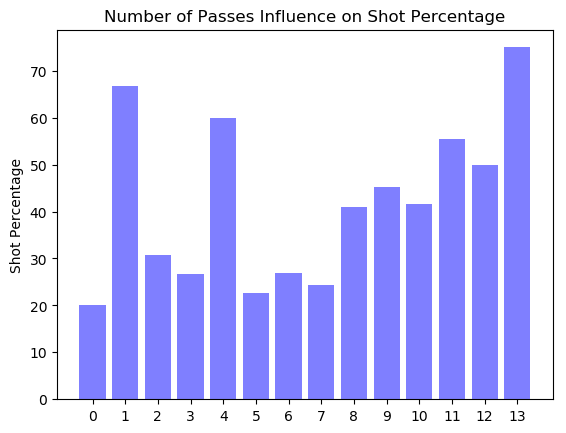

In [122]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
ranges = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13)
pos = np.arange(len(ranges))
plt.bar(pos, passes_percentage(df)['Goal_Percentage'], align='center', alpha=0.5, color = 'b')
plt.xticks(pos, ranges)
plt.ylabel('Shot Percentage')
plt.title('Number of Passes Influence on Shot Percentage')

plt.show()

## Time of Possesion

In [123]:
def bucket_times(df):
    buckets = {}
    bucket = 0
    for n in range(31):
        buckets[n] = bucket
        if n%3 == 0:
            bucket += 1
    df.rename(index=buckets,inplace=True)
    bucket_df = df.groupby(['total_time']).agg({"Goal": "sum", "Attempts": "sum"})
    bucket_df['Goal Percentage'] = bucket_df['Goal']/bucket_df['Attempts']*100
    return bucket_df

In [124]:
def time_of_possession_percentage(df):
    time_df = df.groupby(['total_time']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    time_df.set_index('total_time', inplace=True)
    return time_df

In [125]:
def time_of_possession_percentage_bucket(df):
    time_df = df.groupby(['total_time']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    time_df.set_index('total_time', inplace=True)
    time_df['Goal Percentage'] = time_df['Goal']/time_df['Attempts']
    return bucket_times(time_df)

In [126]:
time_of_possession_percentage(df)

,Goal,Attempts
total_time,,
1.0,0,3
2.0,2,2
3.0,2,2
4.0,3,4
5.0,3,5
6.0,1,4
7.0,2,5
8.0,1,6
9.0,1,4


In [127]:
time_of_possession_percentage_bucket(df)

,Goal,Attempts,Goal Percentage
total_time,,,
1,4,7,57.142857
2,7,13,53.846154
3,4,15,26.666667
4,6,14,42.857143
5,9,26,34.615385
6,15,45,33.333333
7,25,52,48.076923
8,10,38,26.315789
9,2,10,20.000000


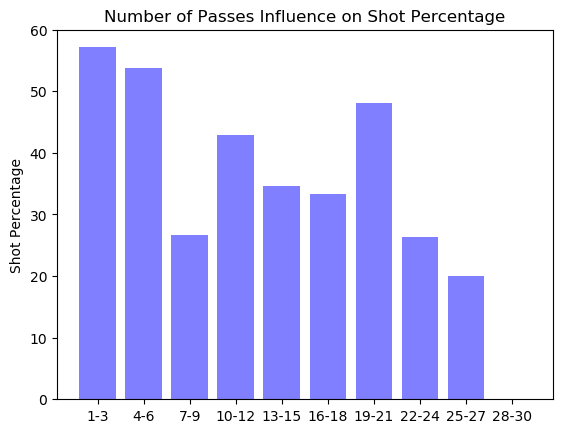

In [131]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
ranges = ('1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27', '28-30')
pos = np.arange(len(ranges))
plt.bar(pos, time_of_possession_percentage_bucket(df)['Goal Percentage'], align='center', alpha=0.5, color = 'b')
plt.xticks(pos, ranges)
plt.ylabel('Shot Percentage')
plt.title('Number of Passes Influence on Shot Percentage')

plt.show()

## Passes per Second

In [138]:
def bucket_passes_per_second(df):
    bucket = {0.08888889:1,0.17777778:2,0.26666667:3,0.35555556:4,
              0.44444444:5,0.53333333:6,0.62222222:7,0.71111111:8,
              0.8:9,2:10}
    new_indices = []
    for index, _ in df.iterrows():
        for threshold in bucket:
            if index <= threshold:
                new_indices.append(bucket[threshold])
                break
    df['PPS Bucket'] = new_indices
    df.set_index(['PPS Bucket'], inplace=True)
    bucket_df = df.groupby(['PPS Bucket']).agg({"Goal": "sum", "Attempts": "sum"})
    bucket_df['Goal_Percentage'] = bucket_df['Goal']/bucket_df['Attempts']*100
    return bucket_df

In [139]:
def passes_per_second_percentage(df):
    df['Passes Per Second'] = df['Number of Passes']/df['total_time']
    time_df = df.groupby(['Passes Per Second']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    time_df.set_index('Passes Per Second', inplace=True)
    return bucket_passes_per_second(time_df)

In [140]:
passes_per_second_percentage(df)

,Goal,Attempts,Goal_Percentage
PPS Bucket,,,
1,1,6,16.666667
2,1,4,25.000000
3,7,28,25.000000
4,12,48,25.000000
5,27,65,41.538462
6,16,45,35.555556
7,10,15,66.666667
8,4,7,57.142857
9,2,2,100.000000


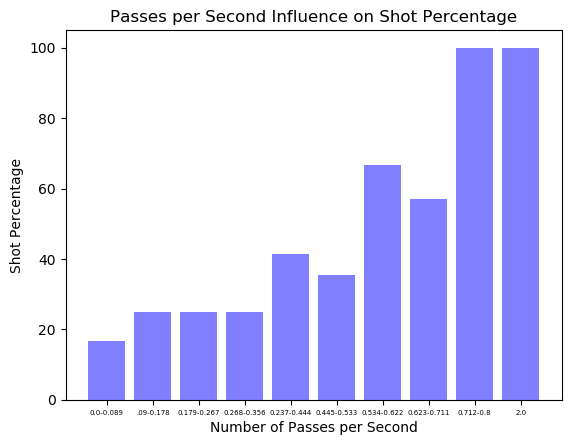

In [169]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
ranges = ('0.0-0.089', '.09-0.178', '0.179-0.267', '0.268-0.356',
        '0.237-0.444', '0.445-0.533', '0.534-0.622', '0.623-0.711', '0.712-0.8','2.0')
pos = np.arange(len(ranges))
bar_width = .5
plt.bar(pos, passes_per_second_percentage(df)['Goal_Percentage'],align='center', alpha=0.5, color = 'b')
plt.xticks(pos, ranges, fontsize=5)
plt.ylabel('Shot Percentage')
plt.title('Passes per Second Influence on Shot Percentage')
plt.xlabel('Number of Passes per Second')

plt.show()

# Rotation Types

In [38]:
def handle_rotations_df(filtered_df, desired_rotation):
    goals_and_misses = filtered_df['Goal'].value_counts()
    if len(goals_and_misses) == 0:
        rotation_df = pd.DataFrame({'Goals':[0], 'Attempts':[0], 'Percentage':[0]})
        rotation_df.rename(index={0:desired_rotation},inplace=True)
        return rotation_df
    goals = goals_and_misses[1]
    attempts = goals_and_misses[0] + goals
    rotation_df = pd.DataFrame({'Goals':[goals], 'Attempts':[attempts], 'Percentage':[goals/attempts*100]})
    rotation_df.rename(index={0:desired_rotation},inplace=True)
    return rotation_df

In [39]:
def rotations(df, desired_rotation):
    matching_indicies = []
    for index, row in df.iterrows():
        filter_copy = desired_rotation.copy()
        if ',' not in row['Rotation Type']:
            rotation_list = [row['Rotation Type']]
        else:
            rotation_list = [x.strip() for x in row["Rotation Type"].split(",")]
        for rotation in desired_rotation:
            if rotation in rotation_list:
                filter_copy.remove(rotation)
            if len(filter_copy) == 0:
                matching_indicies.append(index)
                break
    filtered_df = df.iloc[matching_indicies]
    return handle_rotations_df(filtered_df, desired_rotation)

1 In

In [40]:
rotations(df, ['1_in'])

,Goals,Attempts,Percentage
[1_in],17,60,28.333333


1 Pocket

In [41]:
rotations(df, ['1_pocket'])

,Goals,Attempts,Percentage
[1_pocket],19,48,39.583333


6 In

In [42]:
rotations(df, ['6_in'])

,Goals,Attempts,Percentage
[6_in],52,113,46.017699


6 Pocket

In [43]:
rotations(df, ['6_pocket'])

,Goals,Attempts,Percentage
[6_pocket],7,38,18.421053


4 Center

In [44]:
rotations(df, ['4_center'])

,Goals,Attempts,Percentage
[4_center],41,94,43.617021


5 Center

In [45]:
rotations(df, ['5_center'])

,Goals,Attempts,Percentage
[5_center],15,65,23.076923


2 Pop

In [46]:
rotations(df, ['2_pop'])

,Goals,Attempts,Percentage
[2_pop],14,35,40.0


3 Pop

In [47]:
rotations(df, ['3_pop'])

,Goals,Attempts,Percentage
[3_pop],4,14,28.571429


No rotation

In [48]:
rotations(df, ['none'])

,Goals,Attempts,Percentage
[none],10,26,38.461538


#### Combinations of Rotations

6 In and 4 Center

In [49]:
rotations(df, ['6_in', '4_center'])

,Goals,Attempts,Percentage
"[6_in, 4_center]",33,65,50.769231


1 In and 5 Center

In [50]:
rotations(df, ['1_in', '5_center'])

,Goals,Attempts,Percentage
"[1_in, 5_center]",7,29,24.137931


4 Center and 1 Pocket

In [51]:
rotations(df, ['4_center', '1_pocket'])

,Goals,Attempts,Percentage
"[4_center, 1_pocket]",15,34,44.117647


5 Center and 6 Pocket

In [52]:
rotations(df, ['6_in', '4_center'])

,Goals,Attempts,Percentage
"[6_in, 4_center]",33,65,50.769231


6 In and 1 In

In [53]:
rotations(df, ['6_in', '1_in'])

,Goals,Attempts,Percentage
"[6_in, 1_in]",8,26,30.769231


# Effects of Other Factors

In [54]:
# z-test package
from statsmodels.stats.proportion import proportions_ztest
# calcs from https: stattrek.com/hypothesis-test/difference-in-proportions.aspx
# z score interpreter from https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in
from scipy.stats import norm

In [55]:
def prop_ztest(p1, n1, p2, n2, two_sided=True):
    p = (p1*n1 + p2*n2)/(n1+n2)
    SE = np.sqrt(p*(1-p) * (1/n1+1/n2))
    z = (p1-p2)/SE
    return norm.sf(abs(z))*(1+two_sided)

## Dropped Ball

In [56]:
def dropped_balls_percentage(df):
    dropped_df = df.groupby(["Dropped Ball"]).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    dropped_df.set_index('Dropped Ball', inplace=True)
    dropped_df.rename(index={0:0, 1:'>0', 2:'>0', 3:'>0', 4:'>0'},inplace=True)
    zero_dropped = dropped_df.groupby(['Dropped Ball']).agg({"Goal": "sum", "Attempts": "sum"})
    zero_dropped['Goal_Percentage'] = zero_dropped['Goal']/zero_dropped['Attempts']*100
    return zero_dropped

In [57]:
dropped_balls_percentage(df)

,Goal,Attempts,Goal_Percentage
Dropped Ball,,,
0,49,121,40.495868
>0,33,101,32.673267


## Timeout

In [58]:
# input: df
def timeout_breakdown(df):
    timeout_df = df.groupby(['Timeout']).agg({"Goal": "sum", "Turnover": "count"}).reset_index().rename(columns={'Turnover':'Attempts'})
    timeout_df["Goal_Percentage"] = timeout_df["Goal"]/timeout_df["Attempts"] * 100
    timeout_df.set_index('Timeout', inplace=True)
    timeout_df.rename(index={0:'No Timeout', 1:'Timeout'},inplace=True)
    return timeout_df

In [59]:
pd.DataFrame(timeout_breakdown(df))

,Goal,Attempts,Goal_Percentage
Timeout,,,
No Timeout,66,180,36.666667
Timeout,16,42,38.095238


## Ejected in Front or Backcourt

In [60]:
def ejection_position(df):
    position_df = df.groupby(["Kickout Position"]).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    position_df["Goal_Percentage"] = position_df["Goal"]/position_df["Attempts"] * 100
    position_df.set_index('Kickout Position', inplace=True)
    position_df.rename(index={0:'Frontcourt', 1:'Backcourt'},inplace=True)
    return position_df

In [61]:
ejection_position(df)

,Goal,Attempts,Goal_Percentage
Kickout Position,,,
Frontcourt,66,184,35.869565
Backcourt,16,38,42.105263


## Ejected in Front or Backcourt With Timeout

In [62]:
def timeout_position(df):
    timeout_df = df[df['Timeout'] == 1]
    position_df = timeout_df.groupby(["Kickout Position"]).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    position_df["Goal_Percentage"] = position_df["Goal"]/position_df["Attempts"] * 100
    position_df.set_index('Kickout Position', inplace=True)
    position_df.rename(index={0:'Frontcourt', 1:'Backcourt'},inplace=True)

    return position_df

In [63]:
timeout_position(df)

,Goal,Attempts,Goal_Percentage
Kickout Position,,,
Frontcourt,10,29,34.482759
Backcourt,6,13,46.153846


## End in 3-3

In [64]:
def three_three_percentage(df):
    three_three_df = df.groupby(['End 3-3']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    three_three_df["Goal_Percentage"] = three_three_df["Goal"]/three_three_df["Attempts"] * 100
    three_three_df.set_index('End 3-3', inplace=True)
    three_three_df.rename(index={0:'False', 1:'True'},inplace=True)
    return three_three_df

In [65]:
three_three_percentage(df)

,Goal,Attempts,Goal_Percentage
End 3-3,,,
False,69,200,34.500000
True,13,22,59.090909


## Left vs Right Hand

In [66]:
# output: df of goals, attempts, and percentage for both handedness of each position
def hand_goal_percentage(df, shooter_pos):
    filter_df = df[df['Shooter Position'] == shooter_pos]
    hand_df = filter_df.groupby(['Shooter Hand']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    hand_df["Goal_Percentage"] = hand_df["Goal"]/hand_df["Attempts"] * 100
    hand_df.set_index('Shooter Hand', inplace=True)
    hand_df.rename(index={0:'Left Handed', 1:'Right Handed'},inplace=True)
    return hand_df
#TODO: fill with 0 if it doesnt exist

Shooter at 1

In [67]:
hand_goal_percentage(df, 1)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Right Handed,23,53,43.396226


Shooter at 2

In [68]:
hand_goal_percentage(df, 2)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Left Handed,1,2,50.000000
Right Handed,13,33,39.393939


Shooter at 3

In [69]:
hand_goal_percentage(df, 3)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Left Handed,0,2,0.0
Right Handed,9,20,45.0


Shooter at 4

In [70]:
hand_goal_percentage(df, 4)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Right Handed,11,31,35.483871


Shooter at 5

In [71]:
hand_goal_percentage(df, 5)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Left Handed,3,8,37.500000
Right Handed,4,18,22.222222


Shooter at 6

In [72]:
hand_goal_percentage(df, 6)

,Goal,Attempts,Goal_Percentage
Shooter Hand,,,
Left Handed,11,23,47.826087
Right Handed,7,13,53.846154


In [73]:
# output: df of goals, attempts, and percentage for both handedness of each position
def hand_assist_percentage(df, assist_pos):
    filter_df = df[df['Assisting Player Position'] == assist_pos]
    hand_df = filter_df.groupby(['Assisting Player Hand']).agg({"Goal": "sum", "Timeout": "count"}).reset_index().rename(columns={'Timeout':'Attempts'})
    hand_df["Goal_Percentage"] = hand_df["Goal"]/hand_df["Attempts"] * 100
    hand_df.set_index('Assisting Player Hand', inplace=True)
    hand_df.rename(index={0:'Left Handed', 1:'Right Handed'},inplace=True)
    return hand_df
#TODO: fill with 0 if it doesnt exist

Assisting Player at 1

In [74]:
hand_assist_percentage(df, 1)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Right Handed,10,27,37.037037


Assisting Player at 2

In [75]:
hand_assist_percentage(df,2)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Right Handed,2,2,100.0


Assisting Player at 3

In [76]:
hand_assist_percentage(df,3)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Right Handed,4,6,66.666667


Assisting Player at 4

In [77]:
hand_assist_percentage(df, 4)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Right Handed,24,58,41.37931


Assisting Player 5

In [78]:
hand_assist_percentage(df, 5)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Left Handed,4,10,40.00000
Right Handed,16,41,39.02439


Assisting Playe 6

In [79]:
hand_assist_percentage(df, 6)

,Goal,Attempts,Goal_Percentage
Assisting Player Hand,,,
Left Handed,15,37,40.540541
Right Handed,6,19,31.578947
